# A Cando Demo - mini-Sleb design
We are going to begin to explore and design mini-Sleb mimics - macromolecules that can selectively bind and hydrolyze tetrasaccharides.

## To replay the calculations in this notebook:

Click on this text box and then hit Shift-Enter to evaluate each cell.

Some cells take a few seconds to minutes to evaluate - wait until output appears before moving on to the next cell.

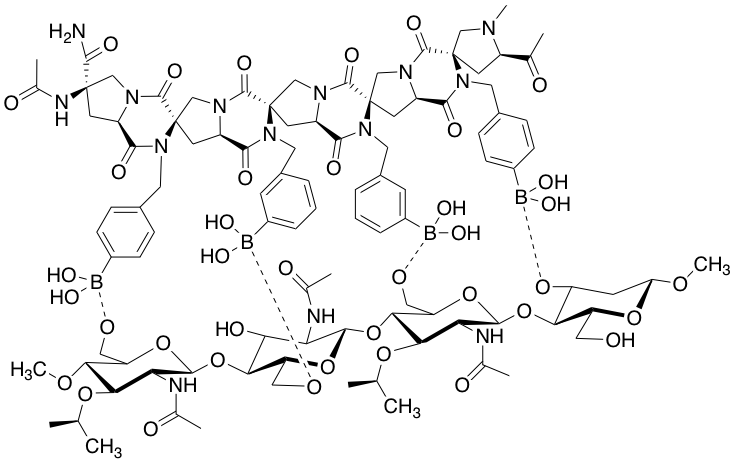

In [1]:
(cl-jupyter-user:png-from-file "data/sleb/half-sleb.png")

#### You can look at the structure and manipulate it using your mouse.

Rotate the molecule by dragging the left mouse button (or trackpad) within the view below.

Zoom (two button drag scroll or scroll wheel).

Pick atoms (hover over an atom and left button click).

At the bottom right corner of the view above is a very small control, drag that to make the view larger or smaller.

Double click with left button to go full screen, hit Escape to return to browser.

## Load and build 3D coordinates of trimer

In [2]:
(:= *agg* (load-chem-draw-aggregate "data/sleb/half-sleb.cdxml"))

*AGG*

In [3]:
(build-hydrogens *agg*)

NIL

In [4]:
(show *agg*)

#<NGLV:NGLWIDGET>

The structure above is the Chemdraw structure with no depth.  It illustrates that the Chemdraw structure is loaded successfuly into Cando.

In [5]:
(:= *stereocenters* (stereocenters-sorted-by-name *agg*))

*STEREOCENTERS*

In [6]:
(set-all-stereocenters-to *stereocenters* :S :show t)

C_305  S
C_315  S
C_325  S
C_335  S
C_345  S
5 stereocenters set


NIL

We randomly displace all atoms to assist the energy minimization that we are about to do below.

In [7]:
(jostle *agg* 20)

NIL

In [8]:
(show *agg*)

#<NGLV:NGLWIDGET>

In the view above, atoms are randomly jostled in space to break them out of "flatland".

## Below we construct a chemically reasonable structure of the molecule by minimizing the conformation energy. 

This does a lot of things in sequence:

1) Cando automatically assigns atom types.

2) Cando assigns Generalized Amber Force Field (GAFF) parameters.

3) Cando minimizes the energy of the structure, automatically switching between three energy minimizers to take advantage of their different speed/convergence characteristics.

In [10]:
(easy-gaff)

Adding force field #<FORCE-FIELD gaff.dat> to DEFAULT



Warning!  Skipping 10-12 hbond


Warning!  Skipping force field atom equivalences



(#<FORCE-FIELD gaff.dat> #<FORCE-FIELD ATOMTYPE_GFF.DEF>)

#### You can ignore the warnings above.

In [12]:
(energy:minimize *agg* 
                 :restraints-on t
                 :max-sd-steps 1000
                 :sd-tolerance 5000.0
                 :max-cg-steps 1000)


An error occurred of type: SIMPLE-PROGRAM-ERROR: 
  Could not find FFNonbondDb type index for type :B

serious-condition backtrace:
0: (ERROR CORE:SIMPLE-PROGRAM-ERROR :FORMAT-CONTROL "Could not find FFNonbondDb type index for type :B" :FORMAT-ARGUMENTS NIL)
1: (APPLY #<FUNCTION ERROR> CORE:SIMPLE-PROGRAM-ERROR :FORMAT-CONTROL "Could not find FFNonbondDb type index for type :B" :FORMAT-ARGUMENTS NIL NIL)
2: (SIGNAL-SIMPLE-ERROR CORE:SIMPLE-PROGRAM-ERROR NIL "Could not find FFNonbondDb type index for type :B" NIL)
3: (MINIMIZE #<AGGREGATE NIL> :RESTRAINTS-ON T :MAX-SD-STEPS 1000 :SD-TOLERANCE 5000.0 :MAX-CG-STEPS 1000)
4: (LAMBDA)



NIL

### Check that the stereochemistry is maintained - they will all still be 'S' configuration.

In [11]:
(calculate-all-stereochemistry *stereocenters*)

Center: #<ATOM :C_1960/:C>  config: S
Center: #<ATOM :C_1961/:C>  config: S
Center: #<ATOM :C_1962/:C>  config: S
Center: #<ATOM :C_1978/:C>  config: S
Center: #<ATOM :C_1979/:C>  config: S
Center: #<ATOM :C_2157/:C>  config: S
Center: #<ATOM :C_2158/:C>  config: S
Center: #<ATOM :C_2159/:C>  config: S
Center: #<ATOM :C_2175/:C>  config: S
Center: #<ATOM :C_2176/:C>  config: S
Center: #<ATOM :C_2182/:C>  config: S
Center: #<ATOM :C_2183/:C>  config: S
Center: #<ATOM :C_2184/:C>  config: S
Center: #<ATOM :C_2200/:C>  config: S
Center: #<ATOM :C_303/:C>  config: S
Center: #<ATOM :C_305/:C>  config: S
Center: #<ATOM :C_313/:C>  config: S
Center: #<ATOM :C_315/:C>  config: S
Center: #<ATOM :C_323/:C>  config: S
Center: #<ATOM :C_325/:C>  config: S
Center: #<ATOM :C_333/:C>  config: S
Center: #<ATOM :C_335/:C>  config: S
Center: #<ATOM :C_343/:C>  config: S
Center: #<ATOM :C_345/:C>  config: S
Center: #<ATOM :C_812/:C>  config: S
Center: #<ATOM :C_813/:C>  config: S
Center: #<ATOM :C_814/:C

NIL

In [12]:
(nglv:show-aggregate *agg*)

A Jupyter Widget